# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import cc3d
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms
from IPython.display import clear_output
from skimage.io import imread, imsave
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

import transforms3d as T
from dataset3d import BNSet, BNSetMasks
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

name_legend = {
    "ac": "brown_cricket",
    "bc": "black_cricket",
    "bf": "blow_fly",
    "bl": "buffalo_bettle_larva",
    "bp": "blow_fly_pupa",
    "cf": "curly-wing_fly",
    "gh": "grasshopper",
    "ma": "maggot",
    "ml": "mealworm",
    "pp": "green_bottle_fly_pupa",
    "sl": "soldier_fly_larva",
    "wo": "woodlice",
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# Mask set unit test

In [18]:
dset = BNSetMasks(data_dir, "train")

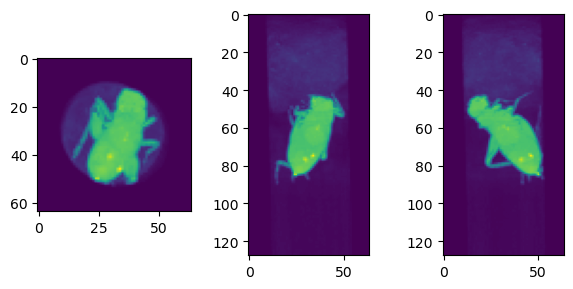

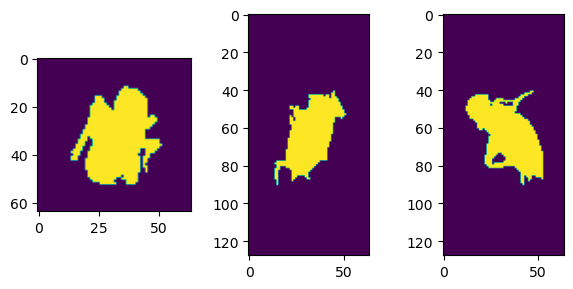

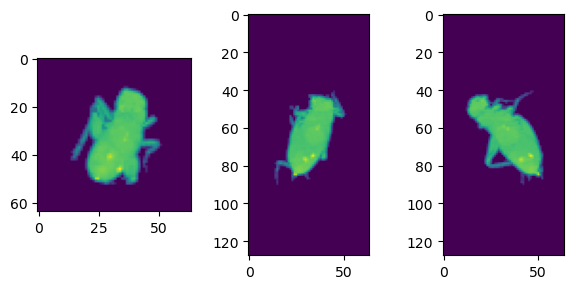

In [19]:
volume, label, mask = dset[10]

show_volume(volume)
show_volume(mask)
show_volume((volume * mask))

# Transforms unit test

In [67]:
transform_shared = transforms.Compose(
    [
        T.ToTensor(),
        T.RandomAxisFlip(0),
        T.RandomAxisFlip(1),
        T.RandomAxisFlip(2),
        transforms.RandomApply([T.RollJitter((6, 3, 3), (-3, -2, -1))], p=0.5),
        transforms.RandomApply([T.RandomRotation((6, 6, 360))], p=0.2),
        
    ]
)
transform_vol = transforms.Compose(
    [
        transforms.RandomApply([T.IntensityJitter(0.1, 0.1)], p=0.3),
        transforms.ToDtype(torch.float32, scale=True),
        T.Standardize(0.0142, 0.0670)
    ]
)


dset = BNSetMasks(data_dir, "train", transform_shared=transform_shared, transform_vol=transform_vol)
# dset = BNSetMasks(data_dir, "train", transform_shared=transform_shared, transform_vol=None)

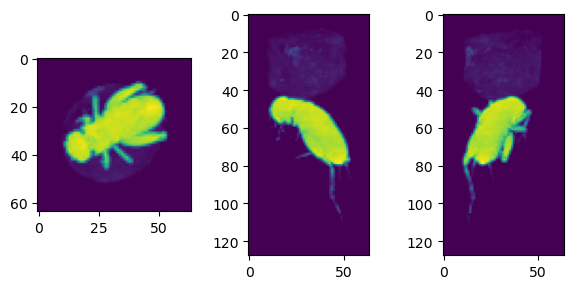

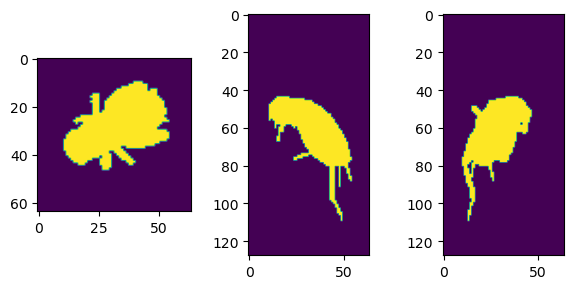

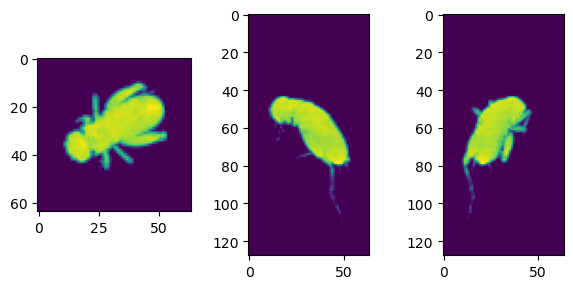

In [68]:
volume, label, mask = dset[0]

show_volume(volume.numpy())
show_volume(mask.numpy())
show_volume((volume * mask).numpy())